In [ ]:
#Import The Solar Flare Data Set Files
#change it according to your files location
labelFile="Data\\labels_1540_4classes_icmla_21.pck"
inputsFile="Data\\mvts_1540_icmla_21.pck"

In [ ]:

import pandas as pd
import pickle

import numpy as np
from numpy import array



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

import random
import matplotlib.pyplot as plt



import pandas as pd



In [ ]:
def loadInputs(file_name):
        with open(file_name, 'rb') as fp:
            obj = pickle.load(fp)
        return obj

In [ ]:
#device = torch.device('cpu')
#print("Processing in :",device)

Sampled_inputs=loadInputs("mvts_1540_icmla_21.pck")
Sampled_labels=loadInputs("labels_1540_4classes_icmla_21.pck") 
trainData = Sampled_inputs
trainLabel = Sampled_labels
print("trainData.shape: ", trainData.shape)
print("trainLebel.shape: ", trainLabel.shape)
print("Classes/labels : ",np.unique(trainLabel))

trainData.shape:  (1540, 33, 60)
trainLebel.shape:  (1540,)
Classes/labels :  [0 1 2 3]


In [ ]:
#standardization/z normalization of the univaraite time series
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
npArrays=[]
for l in range(0, len(trainData)):
  trainData_std = sc.fit_transform(trainData[l])
  #trainData_std = trainData_std.astype(np.float64)
  #print(type(trainData_std[0][0]))
  npArrays.append(trainData_std)

print(type(npArrays))
arr = np.asarray(npArrays)
print(type(arr))
trainData=arr
print("trainData.shape: ",trainData.shape)
print(type(trainData))
print("trainLebel.shape: ",trainLabel.shape)
print(type(trainLabel))

<class 'list'>
<class 'numpy.ndarray'>
trainData.shape:  (1540, 33, 60)
<class 'numpy.ndarray'>
trainLebel.shape:  (1540,)
<class 'numpy.ndarray'>


In [ ]:
#Transposing trainData to shape:(1540, 60, 33)
trainDatatemp=np.empty([1540,60, 33])
n=len(trainData)
for l in range(0, n):
  temp=trainData[l]
  temp=temp.T
  trainDatatemp[l,:,:]=temp
  

trainData=trainDatatemp
print("Transposing trainData shape: ",trainData.shape)

Transposing trainData shape:  (1540, 60, 33)


In [ ]:
#Taking the first 25 parameters which are based parameters:(1540, 60, 25)
trainDatat1=np.empty([1540,60, 25])
n=len(trainData)
for l in range(0, n):
  temp=trainData[l,:,0:25]
  trainDatat1[l,:,:]=temp
  

trainData=trainDatat1
print("trainData shape: ",trainData.shape)

trainData shape:  (1540, 60, 25)


In [ ]:
# Stratify the data
r=0
validation_size=0.2
mvts_1540=trainData
labels_1540=trainLabel
X_train, X_test, y_train, y_test = train_test_split(mvts_1540, labels_1540, test_size=0.3, random_state=r, stratify=labels_1540)
print("\n\n\n *************** Validation Size is: ", validation_size,"of training size")
print("after train validation split:")
X_train, X_val,y_train, y_val= train_test_split(X_train,y_train, test_size=validation_size,random_state=r,stratify=y_train)
#check percentage of examples
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print("X_val shape: ",X_val.shape) 
print("y_val shape ",y_val.shape)
unique_y_train, counts_y_train = np.unique(y_train, return_counts=True)
y_train_stats = dict(zip(unique_y_train, counts_y_train))
print("y_train_counts")
print(y_train_stats)
#270/(269+269+270+270) = 0.25
unique_y_val, counts_y_val = np.unique(y_val, return_counts=True)
y_val_stats = dict(zip(unique_y_val, counts_y_val))
print("y_validation_counts")
print(y_val_stats)
unique_y_test, counts_y_test = np.unique(y_test, return_counts=True)
y_test_stats = dict(zip(unique_y_test, counts_y_test))
print("y_test_counts")
print(y_test_stats)#116/(116+116+115+115) = 0.25




 *************** Validation Size is:  0.2 of training size
after train validation split:
X_train shape:  (862, 60, 25)
y_train shape:  (862,)
X_test shape:  (462, 60, 25)
y_test shape:  (462,)
X_val shape:  (216, 60, 25)
y_val shape  (216,)
y_train_counts
{0: 215, 1: 215, 2: 216, 3: 216}
y_validation_counts
{0: 54, 1: 54, 2: 54, 3: 54}
y_test_counts
{0: 116, 1: 116, 2: 115, 3: 115}


In [ ]:
#Dimensionality Reduction Step
#Calculating the mean for each MVTS column (25 parameters which are based parameters)
trainDatatmean=np.empty([862,25])
n=len(X_train)
for l in range(0, n):
  temp=X_train[l,:,:]
  #print(temp.shape)
  #print(temp.shape[0])
  #print(temp.shape[1])
  x=temp.mean(axis=0)
  #print("mean for mvts:",l,"is=",x)
  trainDatatmean[l]=x

x_train=trainDatatmean
print("trainDatatmean shape: ",trainDatatmean.shape)
   


trainDatatmean shape:  (862, 25)


In [ ]:
print(trainDatatmean[0])

[ 0.10970546  0.10970546  0.25683395  0.10970546  0.10970546  0.10970546
  0.12323007 -5.1863761   0.10970546  0.10970546  0.10970546  0.10970546
  0.10970546  0.10970546  0.10970546  0.10970546  0.10970546 -0.57621396
  0.10970546  0.10970546  2.31077327  0.10970546  0.10970546  0.10970546
  0.10970546]


In [ ]:
c=np.mean(X_train[0,:,7])
print(c)

-5.186376103170483


In [ ]:
# feature selection
def select_features(X_train, y_train):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_classif, k=25)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	#X_test_fs = fs.transform(X_test)
	return X_train_fs, fs

In [ ]:
# configure to select all features
fs = SelectKBest(score_func=mutual_info_classif, k='all')
# learn relationship from training data
fs.fit(x_train, y_train)
# transform train input data
X_train_fs = fs.transform(x_train)


Feature 0: 0.089860
Feature 1: 0.089860
Feature 2: 0.312594
Feature 3: 0.089860
Feature 4: 0.089860
Feature 5: 0.089860
Feature 6: 0.078214
Feature 7: 0.158125
Feature 8: 0.092756
Feature 9: 0.089840
Feature 10: 0.089938
Feature 11: 0.089291
Feature 12: 0.094629
Feature 13: 0.092756
Feature 14: 0.092756
Feature 15: 0.092603
Feature 16: 0.089860
Feature 17: 0.118257
Feature 18: 0.089938
Feature 19: 0.089860
Feature 20: 0.113435
Feature 21: 0.089860
Feature 22: 0.089860
Feature 23: 0.089860
Feature 24: 0.089860


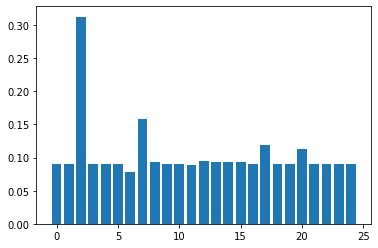

In [ ]:
from matplotlib import pyplot
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


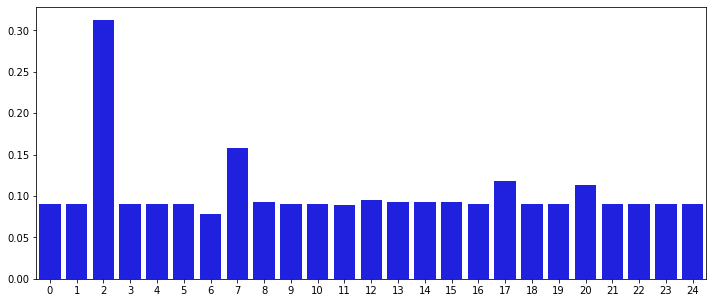

In [ ]:
import seaborn as sns
X= np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.subplots(figsize=(12,5)) # set the size that you'd like (width, height)
clrs = ['blue' ]
sns.barplot(X, fs.scores_,label=X,x="Feature number", y="Univariate score ($-Log(p_{value})$)",palette=clrs)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


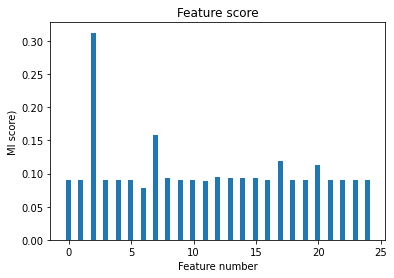

In [ ]:
import matplotlib.pyplot as plt

X_indices = np.arange(trainData.shape[-1])
print(X_indices)
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, fs.scores_, width=0.4)
plt.title("Feature score")
plt.xlabel("Feature number")
plt.ylabel(r"MI score)")
plt.show()

In [ ]:
from tabulate import tabulate
df=pd.DataFrame({'Feature Number': X+1, 'MI Score': fs.scores_})
print(tabulate(df,headers="keys", tablefmt='fancy_grid'))

╒════╤══════════════════╤════════════╕
│    │   Feature Number │   MI Score │
╞════╪══════════════════╪════════════╡
│  0 │                1 │  0.0898596 │
├────┼──────────────────┼────────────┤
│  1 │                2 │  0.0898596 │
├────┼──────────────────┼────────────┤
│  2 │                3 │  0.312594  │
├────┼──────────────────┼────────────┤
│  3 │                4 │  0.0898596 │
├────┼──────────────────┼────────────┤
│  4 │                5 │  0.0898596 │
├────┼──────────────────┼────────────┤
│  5 │                6 │  0.0898596 │
├────┼──────────────────┼────────────┤
│  6 │                7 │  0.0782139 │
├────┼──────────────────┼────────────┤
│  7 │                8 │  0.158125  │
├────┼──────────────────┼────────────┤
│  8 │                9 │  0.0927559 │
├────┼──────────────────┼────────────┤
│  9 │               10 │  0.08984   │
├────┼──────────────────┼────────────┤
│ 10 │               11 │  0.0899377 │
├────┼──────────────────┼────────────┤
│ 11 │               12 │

In [ ]:
df.to_excel('MI_Scores.xlsx')